# Simple Polynomial Regression

In [64]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

In [3]:
# Creating the data 
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

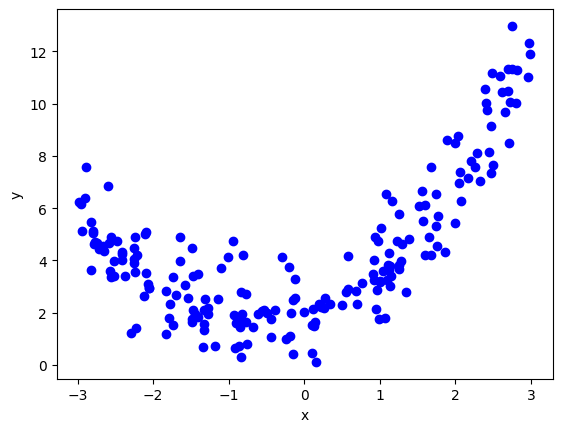

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X , y , c='b')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
X.shape , y.shape

((200, 1), (200, 1))

In [7]:
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [10]:
X_train.shape , X_test.shape

((160, 1), (40, 1))

In [11]:
lr1 = LinearRegression()
lr1.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = lr1.predict(X_test)
r2 = r2_score(y_test ,y_pred)
print(r2)

0.3551042710057276


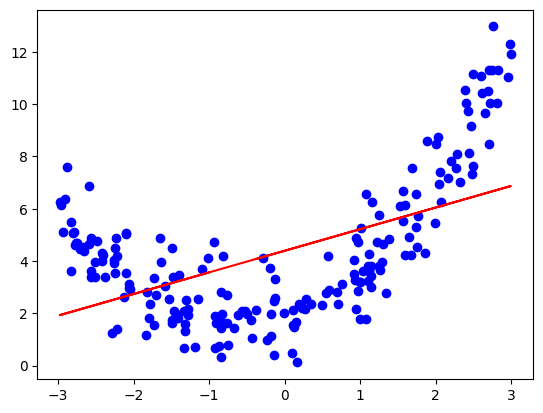

In [13]:
plt.scatter(X , y , c='b')
plt.plot(X , lr1.predict(X) , c='r')

plt.show()

In [14]:
poly = PolynomialFeatures(degree=2 , include_bias=False) # if include_biase=False , X, X^2 else 1 , X , X^2

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [17]:
X_train_trans.shape , X_train.shape

((160, 2), (160, 1))

In [20]:
# Now Lets Plot the figure in 3d 
import plotly.express as px 

fig = px.scatter_3d( x=X_train_trans[:,0].ravel() , y=X_train_trans[:,1].ravel() , z=y_train.ravel())

fig.show()

In [21]:
poly2 = PolynomialFeatures(degree=2 , include_bias=True)
X_train_trans2 = poly2.fit_transform(X_train)
X_test_trans2 = poly2.transform(X_test)

In [35]:
poly2.powers_

array([[0],
       [1],
       [2]])

In [22]:
lr2 = LinearRegression()
lr2.fit(X_train_trans2 , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lr2.coef_             # value of a and b  ax+bx^2+c

array([[0.        , 1.00257664, 0.78478096]])

In [ ]:
lr2.intercept_    # value of c =2 in original 

array([1.98383495])

In [23]:
y_pred = lr2.predict(X_test_trans2)
r2score = r2_score(y_test , y_pred )

print(r2score)

0.8796517186614353


In [29]:
X_new = np.linspace(-3 ,3,200).reshape(-1,1)
X_new_poly = poly2.transform(X_new)
y_new  = lr2.predict(X_new_poly)

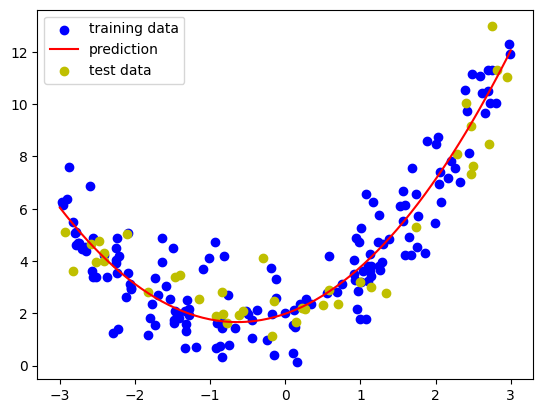

In [ ]:
plt.scatter(X_train , y_train , c= 'b' , label='training data')
plt.plot(X_new , y_new , c='r' , label='prediction')
plt.scatter(X_test , y_test , c='y' , label ='test data')
plt.legend()
plt.show()


# Multipolynomial Regression

In [34]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [39]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [40]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [42]:
import plotly.graph_objects as go

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [43]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [55]:
poly3 = PolynomialFeatures(degree=2)
X_multi_trans = poly3.fit_transform(X_multi)


In [70]:
# print("Input",poly3.n_input_features_)
# print("Ouput",poly3.n_output_features_)
print("Powers\n",poly3.powers_)


Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [71]:
X_multi_trans.shape

(100, 6)

In [72]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
X_test_multi = poly3.transform(final)


In [80]:
z_final = lr.predict(X_test_multi).reshape(10,10)

In [81]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z_final.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()